In [ ]:
# prompt: mount google

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/REL301m/PEP_historical_data_StockScan_train.csv')
df_train.columns = df_train.columns.str.lower()
df_train.tail()

,date,volume,open,close,high,low
2003,2015-07-10,7233600,95.419998,95.550003,96.269997,95.010002
2004,2015-07-09,9932300,97.339996,94.589996,97.349998,94.080002
2005,2015-07-08,6055100,95.709999,95.610001,96.279999,95.510002
2006,2015-07-07,7724800,94.779999,96.400002,96.660004,94.540001
2007,2015-07-06,4952400,94.040001,94.400002,94.919998,94.010002


In [ ]:
df_train.head()

,date,volume,open,close,high,low
0,2023-06-30,7102576,184.04,185.22,185.52,183.8800
1,2023-06-29,5769723,183.25,183.88,183.89,181.3900
2,2023-06-28,5193731,186.25,183.70,186.74,183.3800
3,2023-06-27,5762346,184.67,186.22,186.61,183.9600
4,2023-06-26,3705140,186.16,184.89,186.43,184.1203


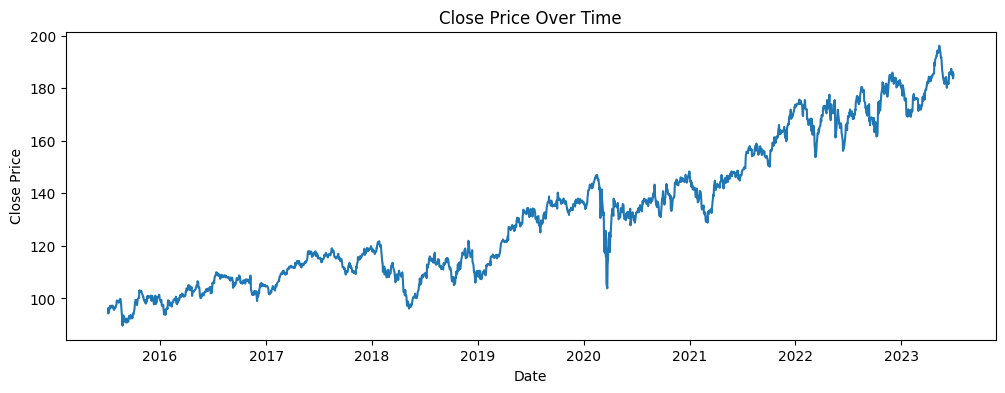

In [ ]:
df_train['date'] = pd.to_datetime(df_train['date'])
df = df_train.sort_values('date')
plt.figure(figsize=(12,4))
plt.plot(df['date'], df['close'])
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(
    x=df_train['date'],
    open=df_train['open'],
    high=df_train['high'],
    low=df_train['low'],
    close=df_train['close'])])
fig.update_layout(title="Biểu đồ nến giá cổ phiếu PEP lịch sử (2015-2023)")
fig.show()


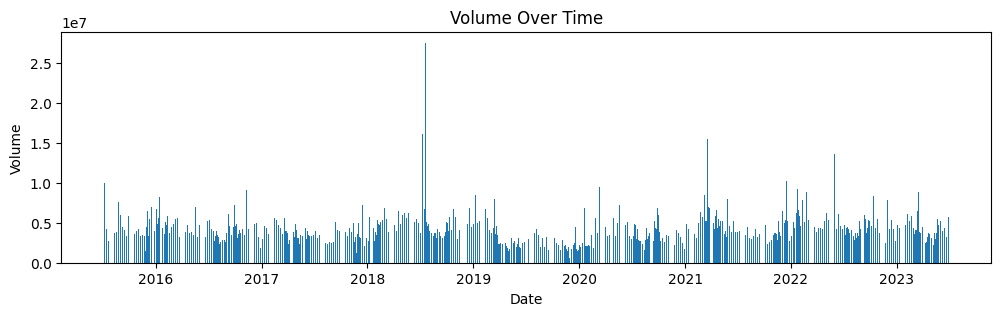

In [ ]:
plt.figure(figsize=(12,3))
plt.bar(df_train['date'], df_train['volume'])
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


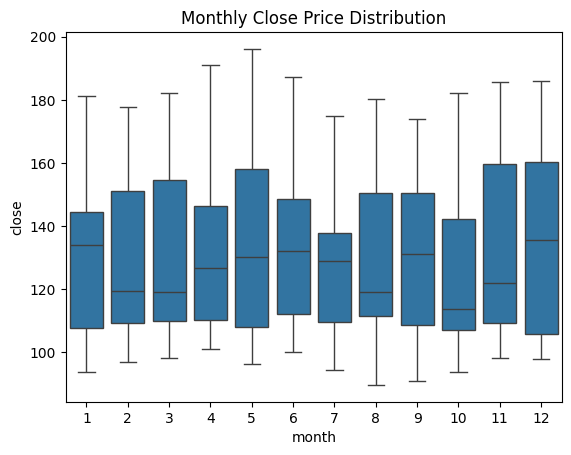

In [ ]:
df_train['month'] = df_train['date'].dt.month
sns.boxplot(x='month', y='close', data=df_train)
plt.title('Monthly Close Price Distribution')
plt.show()


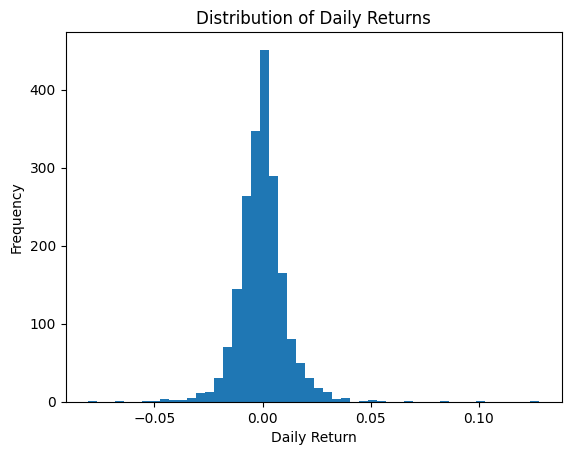

In [ ]:
df_train['returns'] = df_train['close'].pct_change()
plt.hist(df_train['returns'].dropna(), bins=50)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


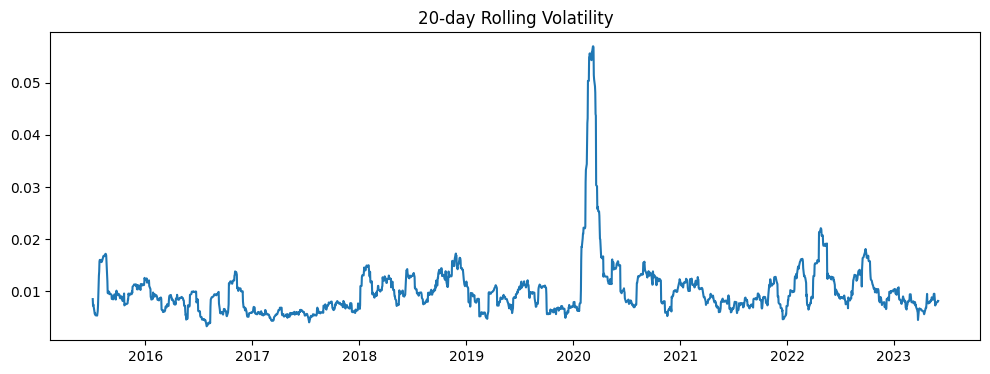

In [ ]:
df_train['volatility'] = df_train['returns'].rolling(20).std()
plt.figure(figsize=(12,4))
plt.plot(df_train['date'], df_train['volatility'])
plt.title('20-day Rolling Volatility')
plt.show()


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/REL301m/PEP_historical_data_StockScan_test.csv')
df_test.columns = df_test.columns.str.lower()
df_test.tail()

,date,volume,open,close,high,low
497,2023-07-10,5506658,184.07,184.30,185.91,183.7750
498,2023-07-07,6309695,185.82,183.08,185.88,183.0300
499,2023-07-06,5441915,185.81,186.60,186.75,184.8925
500,2023-07-05,5276862,185.00,186.58,186.69,184.9700
501,2023-07-03,2388969,184.30,185.60,185.64,183.4700


In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(
    x=df_test['date'],
    open=df_test['open'],
    high=df_test['high'],
    low=df_test['low'],
    close=df_test['close'])])
fig.update_layout(title="Biểu đồ nến giá cổ phiếu PEP lịch sử (2023-2025)")
fig.show()
